<a href="https://colab.research.google.com/github/SEAFARI/pytorch-deeplearning/blob/main/Pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Importing pytorch
import torch
torch.version

<module 'torch.version' from '/usr/local/lib/python3.12/dist-packages/torch/version.py'>

In [3]:
## Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
## We can check the dimensions of a tensor using the ndim attribute.
scalar.ndim

0

In [5]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

In [6]:
# A vector is a single dimension tensor but can contain many numbers.
vector = torch.tensor([3,2])
vector

tensor([3, 2])

In [7]:
vector.ndim  ## single dimension

1

In [8]:
# Check shape of vector
vector.shape  #The shape tells you how the elements inside them are arranged.

torch.Size([2])

In [9]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape ## two elements deep and two elements wide.

torch.Size([2, 2])

In [12]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [14]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

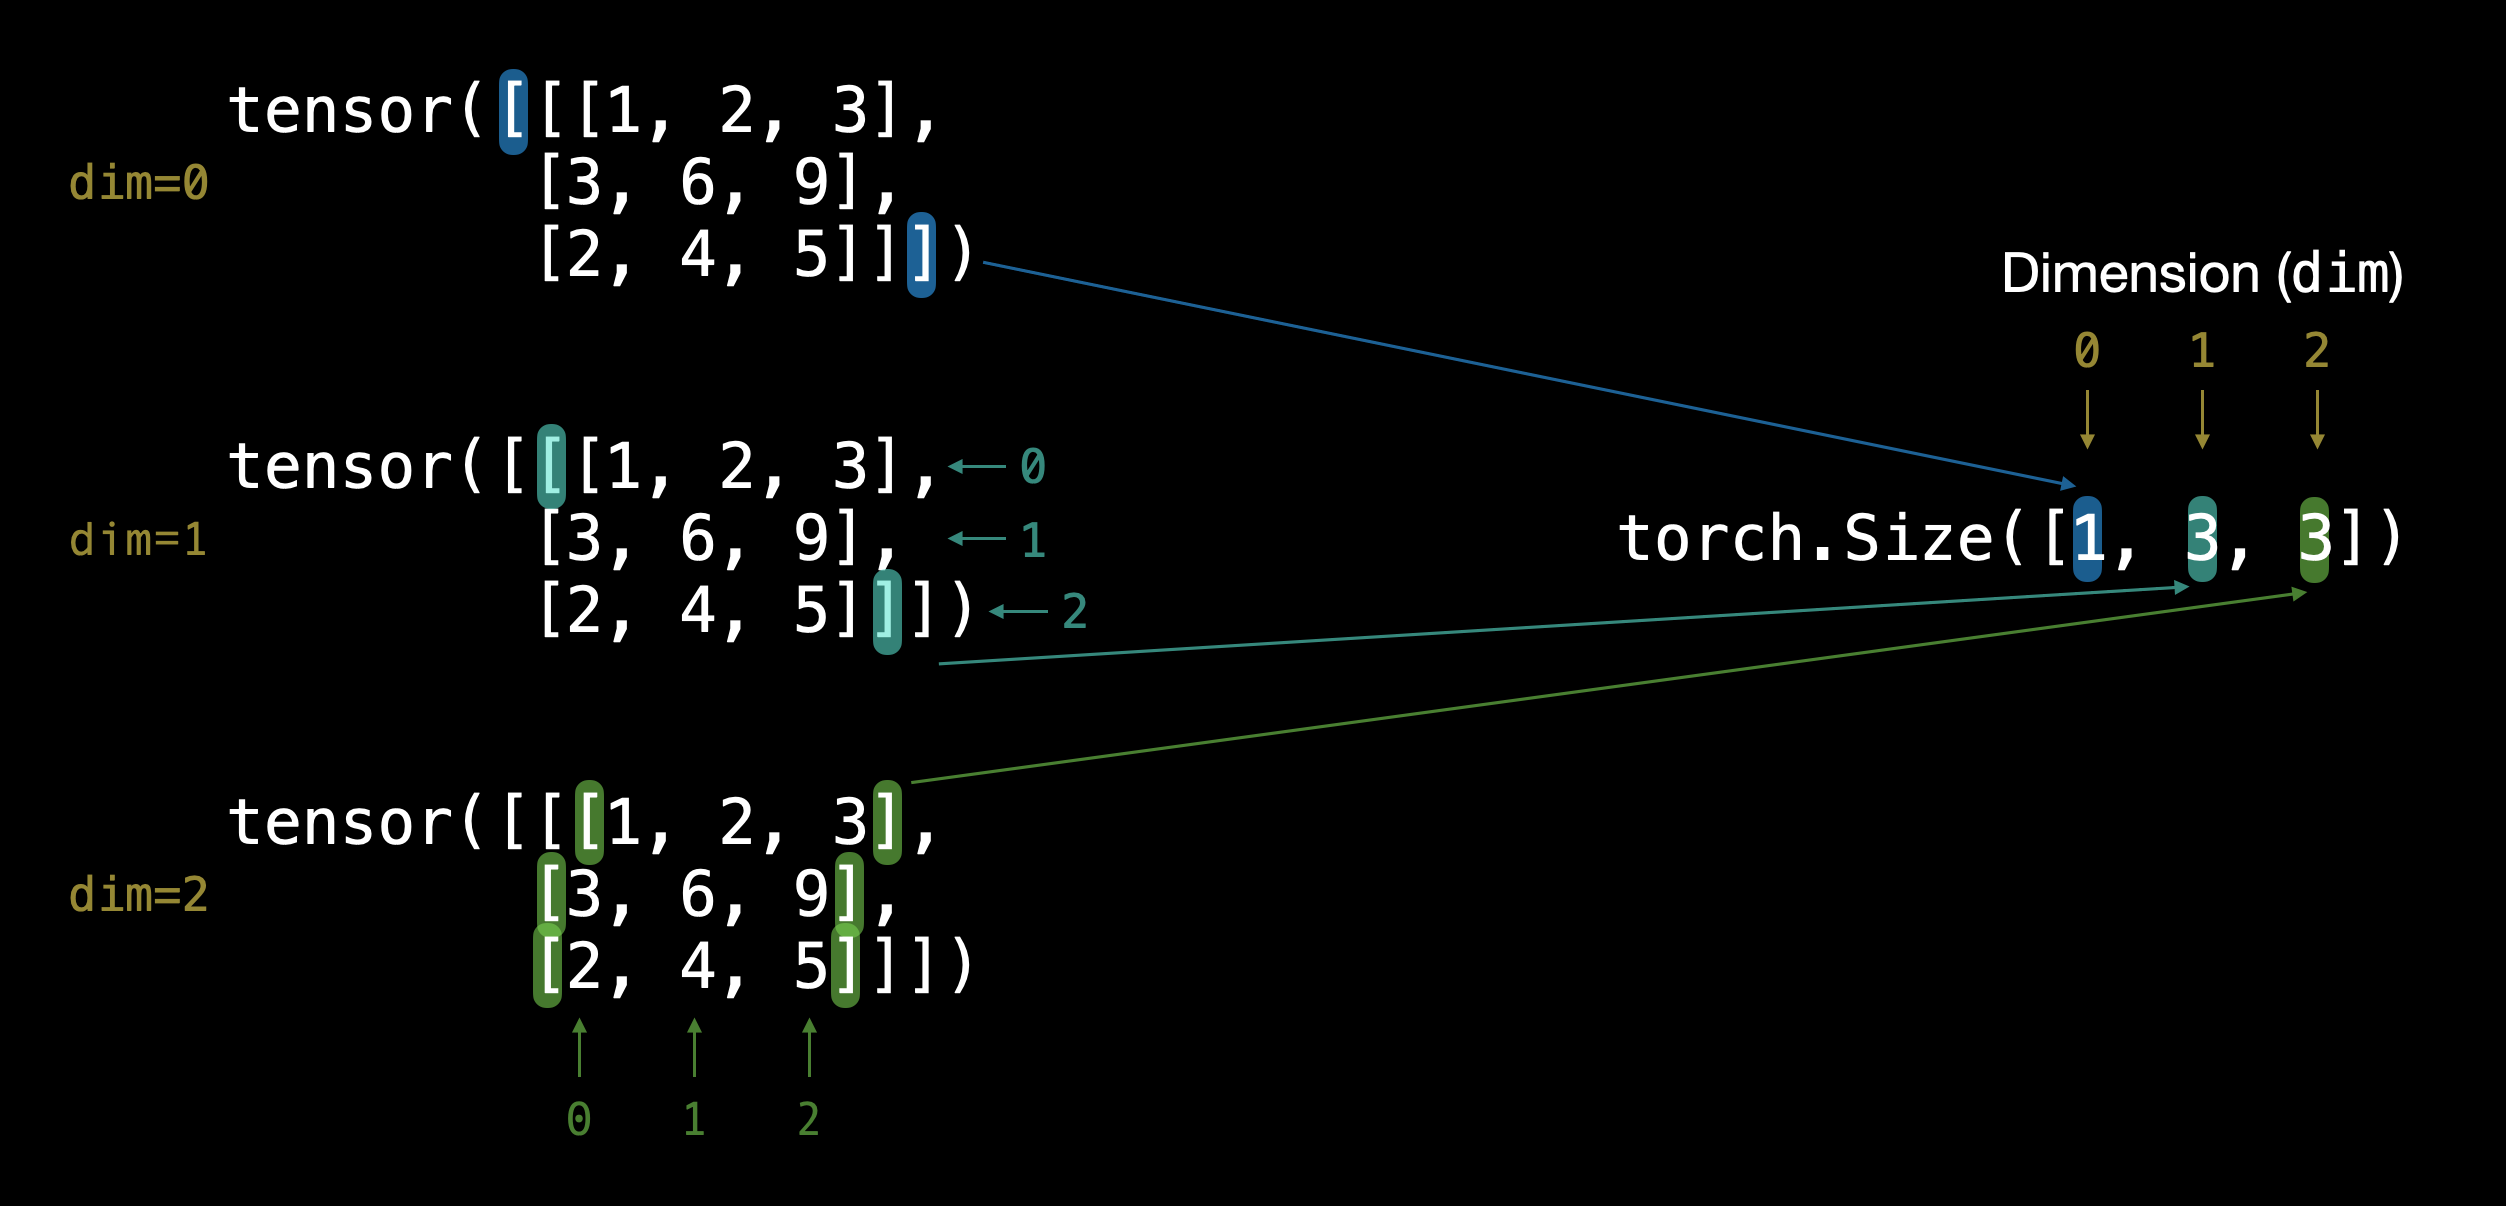

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

In [15]:
## Random Tensor

random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.shape

(tensor([[0.1290, 0.0455, 0.1432, 0.8278],
         [0.3903, 0.5924, 0.3413, 0.4040],
         [0.8923, 0.5205, 0.0787, 0.4463]]),
 torch.Size([3, 4]))

The flexibility of torch.rand() is that we can adjust the size to be whatever we want.

For example, say you wanted a random tensor in the common image shape of [224, 224, 3] ([height, width, color_channels]).

In [16]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [17]:
## Zeros and ones

zeros = torch.zeros(size=(3,4))
zeros, zeros.ndim

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 2)

Creating a range and tensors like
Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use torch.arange(start, end, step) to do so.

In [18]:
# Use torch.arange()
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
## tensor of a certain type with the same shape as another tensor.
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
ten_ones = torch.ones_like(input=zero_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor datatypes

There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Getting to know which one can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or `torch.double`).

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

Plus more!

> **Note:** An integer is a flat round number like `7` whereas a float has a decimal `7.0`.

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

> **Resources:**
  * See the [PyTorch documentation for a list of all available tensor datatypes](https://pytorch.org/docs/stable/tensors.html#data-types).
  * Read the [Wikipedia page for an overview of what precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) is.

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [21]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is torch.float32 and the other is torch.float16 (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

For now let's create a tensor with dtype=torch.float16.

In [23]:
float_16_tensor = torch.tensor([3.0,4.0,5.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [28]:
## create a tensor
tensor = torch.rand(size=(3,4))

# Find out details about it
print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}") # will default to CPU

tensor([[0.3918, 0.9038, 0.1706, 0.7368],
        [0.4732, 0.0633, 0.0043, 0.4705],
        [0.6971, 0.1790, 0.6586, 0.0877]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> **Note:** When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":
  * "*what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where*"

# MANIPULATING TENSORS

In [32]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([10,20,30])
tensor + 10

tensor([20, 30, 40])

In [33]:
## Multiply it by 10
tensor * 10

tensor([100, 200, 300])

Notice how the tensor values above didn't end up being `tensor([110, 120, 130])`, this is because the values inside the tensor don't change unless they're reassigned.

In [34]:
## IMPORTANT  --> # Tensors don't change unless reassigned

tensor

tensor([10, 20, 30])

In [35]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([ 0, 10, 20])

In [36]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([10, 20, 30])

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplication) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations.

In [37]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([100, 200, 300])

In [38]:
# Original tensor is still unchanged
tensor

tensor([10, 20, 30])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [39]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([10, 20, 30]) * tensor([10, 20, 30])
Equals: tensor([100, 400, 900])


### Matrix multiplication (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [40]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [41]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [42]:
## matrix multiplication
torch.matmul(tensor,tensor)

tensor(14)

In [43]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

In [44]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 843 µs, sys: 1.04 ms, total: 1.89 ms
Wall time: 4.06 ms


tensor(14)

In [45]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 315 µs, sys: 16 µs, total: 331 µs
Wall time: 263 µs


tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [46]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

Let's try the latter.

In [47]:
## view tensor A and B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [48]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [52]:
torch.mm(tensor_A,tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [51]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$

Where:
* `x` is the input to the layer (deep learning is a stack of layers like `torch.nn.Linear()` and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).
  * **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?

In [64]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])




![matrix multiplication is all you need](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_matrix_multiplication_is_all_you_need.jpeg)



### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [69]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [74]:
x.dtype

torch.int64

> **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.

You can also do the same as above with `torch` methods.

In [75]:
print(f"Minimum: {x.min()} ")
print(f"Maximum: {x.max()} ")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"sum: {x.sum()} ")

Minimum: 0 
Maximum: 90 
Mean: 45.0
sum: 450 


In [79]:
torch.max(x),torch.min(x),torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) and [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectively.


In [77]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check its datatype (the default is `torch.float32`).

In [83]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [85]:
## create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [87]:
## create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note:** Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts. For more on this, I'd read up about [precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)).

> **Exercise:** So far we've covered a fair few tensor methods but there's a bunch more in the [`torch.Tensor` documentation](https://pytorch.org/docs/stable/tensors.html), I'd recommend spending 10-minutes scrolling through and looking into any that catch your eye. Click on them and then write them out in code yourself to see what happens.

### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

First, we'll create a tensor.

In [88]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`.

In [91]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [96]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too.

In [97]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [99]:
# Changing x changes z
x[0] = 1
z, x

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [117]:
## stacking tensors on top of each other

stacked = torch.stack([x,x,x,x],dim=0)
stacked.shape, stacked.ndim


(torch.Size([4, 7]), 2)

In [124]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [125]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

## Indexing (selecting data from tensors)

Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [127]:
## create a tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [129]:
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [130]:
x[:,0]

tensor([[1, 2, 3]])

In [131]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [132]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [136]:
x[:,2,1]

tensor([8])

In [137]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

Numpy and Tensor

In [140]:
## Numpy array to tensor
import numpy as np
array = np.arange(0,10)
numpy_tensor = torch.from_numpy(array)
numpy_tensor.dtype, array, numpy_tensor

(torch.int64,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).
>
> However, many PyTorch calculations default to using `float32`.
>
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [142]:
# Change the array, keep the tensor
array = array + 1
array, numpy_tensor

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [143]:
## Tensor to numpy
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [144]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Well, pseudorandomness that is. Because after all, as they're designed, a computer is fundamentally deterministic (each step is predictable) so the randomness they create are simulated randomness (though there is debate on this too, but since I'm not a computer scientist, I'll let you find out more yourself).

How does this relate to neural networks and deep learning then?

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In short:

``start with random numbers -> tensor operations -> try to make better (again and again and again)``

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

In [145]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

In [146]:
print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.2666, 0.6274, 0.2696, 0.4414],
        [0.2969, 0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472, 0.0062]])

Tensor B:
tensor([[0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040],
        [0.5547, 0.3423, 0.6343, 0.3644]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [151]:
import random

RANDOM_SEED = 42
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [1]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [2]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [5]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [6]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')